In [7]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Solving MNIST  by nearest distances
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
os.chdir('E:\\داده\\project')
train = pd.read_csv('mnist_train.csv')
test= pd.read_csv('mnist_test.csv')
#I seprate the image features and the number in test and tran datasets
train_lable=train.iloc[:,:1]
train=train.iloc[:,1:]
test_lable=test.iloc[:,:1]
test=test.iloc[:,1:]

In [67]:
def image_show(i, data, label):
    x = data.iloc[i].values # get the vectorized image
    x = x.reshape((28,28)) # reshape it into 28x28 format
    print('The image label of index %d is %d.' %(i, label.iloc[i]))
    plt.imshow(x, cmap='gray') # show the image

The image label of index 10 is 5.


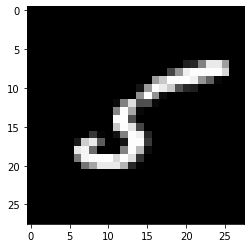

In [68]:
#test the number image
image_show(10, train,train_lable)

In [76]:
def distance(x,y):
    return np.sqrt(np.sum(np.square(x-y)))
def kNN(x, data, label):
    #create a list of distances between the given image and the images of the training set
    distances =[distance(x,data.iloc[i]) for i in range(len(data))]
    idx = np.argmin(distances)
    return label.iloc[idx]

In [108]:
def accuracy_set(data, label, train_data, train_label):
    cnt = 0
    for i in range(len(data)):
        if kNN(data.iloc[i], train_data, train_label).equals(label.iloc[i]):
            cnt += 1
    return cnt/len(label)

In [ ]:
# the precentage of accuracy of this method
acc=accuracy_set(test,test_lable,train,train_lable)